In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
titanic_df_temp= pd.read_csv('data/train.csv')
#titanic_df_temp.head()
#titanic_df_temp.dropna(inplace=True)
titanic_df_temp['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [16]:
titanic_df=titanic_df_temp.set_index('PassengerId').copy()
titanic_df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [17]:
def embarked_transfo(ligne) :
    if ligne['Embarked']=='C' :
        return 1
    elif ligne['Embarked']=='S' :
        return 2
    elif ligne['Embarked']=='Q' :
        return 3
    else :
        return None

def sex_transfo(ligne) :
    if ligne['Sex']=='male' :
        return 1
    elif ligne['Sex']=='female' :
        return 2
    else :
        return None

def age_transfo(ligne) :
    if ligne['Age'] >= 18 :
        return 1
    elif ligne['Age'] < 18 :
        return 0
    else :
        return None

In [18]:
titanic_df_clean=titanic_df.drop(['Name'], axis='columns').copy()
titanic_df_clean.drop(['Cabin'], axis='columns', inplace=True)
titanic_df_clean.drop(['Ticket'], axis='columns', inplace=True)
titanic_df_clean['Num_Embarked']=titanic_df_clean.apply(embarked_transfo, axis=1)
titanic_df_clean['Num_sex']=titanic_df_clean.apply(sex_transfo, axis=1)
titanic_df_clean['Label_mineur_majeur']= titanic_df_clean.apply(age_transfo, axis=1)
titanic_df_clean.dropna(inplace=True)
titanic_df_clean.drop(['Embarked', 'Sex'], axis='columns', inplace=True)
titanic_df_clean.drop(['SibSp', 'Parch'], axis='columns', inplace=True)
#titanic_df_clean['Ticket'].value_counts()
titanic_df_clean.reset_index(drop=True, inplace=True)
titanic_df_clean

,Survived,Pclass,Age,Fare,Num_Embarked,Num_sex,Label_mineur_majeur
0,0,3,22.0,7.2500,2.0,1,1.0
1,1,1,38.0,71.2833,1.0,2,1.0
2,1,3,26.0,7.9250,2.0,2,1.0
3,1,1,35.0,53.1000,2.0,2,1.0
4,0,3,35.0,8.0500,2.0,1,1.0
...,...,...,...,...,...,...,...
707,0,3,39.0,29.1250,3.0,2,1.0
708,0,2,27.0,13.0000,2.0,1,1.0
709,1,1,19.0,30.0000,2.0,2,1.0
710,1,1,26.0,30.0000,1.0,1,1.0


In [19]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import learning_curve


# On sépare les features du target :
features, target = titanic_df_clean.loc[:, 'Pclass':'Label_mineur_majeur'], titanic_df_clean["Survived"]

# On split notre dataframe en 2 :
feat_train, feat_test, target_train, target_test = train_test_split(features, target, test_size = 0.4)

# On standardise :  
scaler = StandardScaler()
feat_train = scaler.fit_transform(feat_train)
feat_test = scaler.transform(feat_test)

In [20]:
features

,Pclass,Age,Fare,Num_Embarked,Num_sex,Label_mineur_majeur
0,3,22.0,7.2500,2.0,1,1.0
1,1,38.0,71.2833,1.0,2,1.0
2,3,26.0,7.9250,2.0,2,1.0
3,1,35.0,53.1000,2.0,2,1.0
4,3,35.0,8.0500,2.0,1,1.0
...,...,...,...,...,...,...
707,3,39.0,29.1250,3.0,2,1.0
708,2,27.0,13.0000,2.0,1,1.0
709,1,19.0,30.0000,2.0,2,1.0
710,1,26.0,30.0000,1.0,1,1.0


In [21]:
k_range = list(range(1, 50))

param_grid = dict(n_neighbors=k_range, leaf_size=k_range)


In [22]:
# defining parameter range
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(feat_train, target_train)

Fitting 5 folds for each of 2401 candidates, totalling 12005 fits


In [23]:
kopti =grid_search.best_params_['n_neighbors']
leafopti = grid_search.best_params_['leaf_size']
kopti, leafopti

(3, 1)

In [24]:
print(grid_search.best_score_ * 100)

80.35294117647058


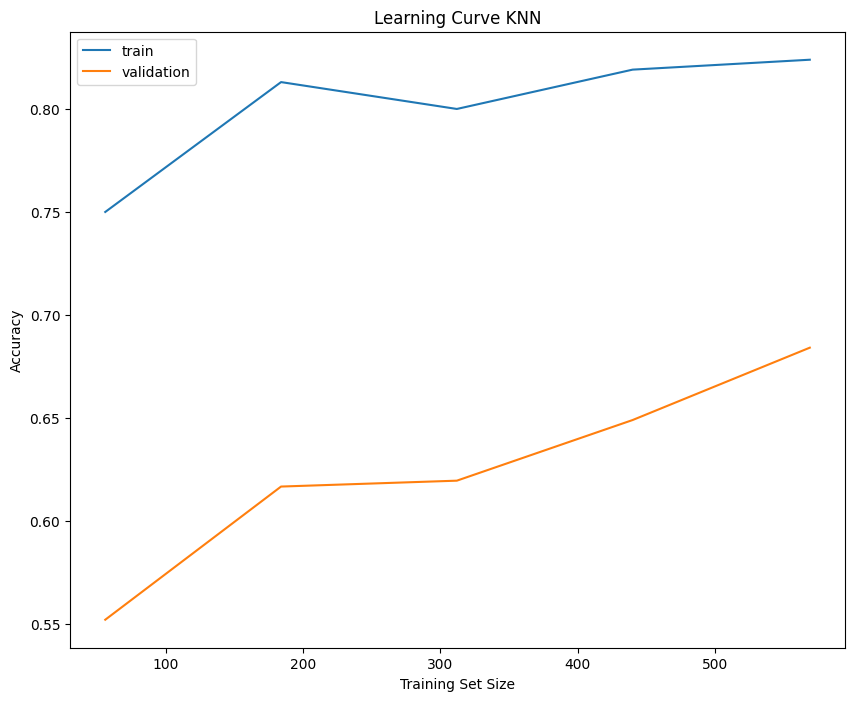

In [25]:

train_sizes, train_scores, test_scores = learning_curve(
    estimator=KNeighborsClassifier(n_neighbors=kopti, leaf_size=leafopti),
    X=features,
    y=target,
    cv=5,
    scoring="accuracy"
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve KNN")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")

plt.show()

## Pipeline

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [48]:
titanic_df_pipe=titanic_df.dropna()

# On sépare les features du target :
features, target = titanic_df_pipe.loc[:, ['Pclass','Sex', 'Age', 'Fare', 'Embarked' ]], titanic_df_pipe["Survived"]

# On split notre dataframe en 2 :
feat_train, feat_test, target_train, target_test = train_test_split(features, target, test_size = 0.4)

In [49]:
num_data=['Age', 'Fare', 'Pclass']
num_transformer = StandardScaler()

cat_data=['Sex', 'Embarked']
cat_transformer=OneHotEncoder(handle_unknown='ignore')

preprocessor=ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_data),
        ('cat', cat_transformer, cat_data)
    ]
)

In [50]:
# Logistic regression
pipeline_lr=Pipeline(
    steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())]
)

# Knn
pipeline_knn=Pipeline(
    steps=[('preprocessor', preprocessor), ('classifier', KNeighborsClassifier())]
)

# SVM linear
pipeline_svcl=Pipeline(
    steps=[('preprocessor', preprocessor), ('classifier', SVC(kernel='linear'))]
)

# Random Forest
pipeline_randot=Pipeline(
    steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())]
)

#Decision tree
pipeline_decit=Pipeline(
    steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())]
)

In [51]:
pipelines=[pipeline_lr, pipeline_knn, pipeline_svcl, pipeline_randot, pipeline_decit]

pip_dict={0: 'Logistic Regression', 1: 'Nearest Neighbors', 2: 'SVM linear', 3: 'Random tree', 4: 'Decision tree'}

In [53]:
# for pipe in pipelines :
#     pipe.fit(feat_train, target_train)

In [58]:
for i,model in enumerate(pipelines) :
    temp=cross_val_score(model, feat_train, target_train, cv=5, scoring='accuracy').mean()
    print(f'{pip_dict[i]} Cross-validation accuracy {temp}')

Logistic Regression Cross-validation accuracy 0.7432900432900433
Nearest Neighbors Cross-validation accuracy 0.7714285714285715
SVM linear Cross-validation accuracy 0.7155844155844157
Random tree Cross-validation accuracy 0.7705627705627707
Decision tree Cross-validation accuracy 0.7350649350649351
